In [1]:
# XGBOOST on MNST dataset

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

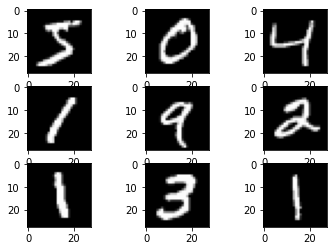

In [3]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
for i in range(9):
    print(y_train[i])

5
0
4
1
9
2
1
3
1


In [5]:
image_vector_size = 28*28
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [6]:
print(x_train.shape)

(60000, 784)


In [7]:
print(y_train.shape)

(60000,)


In [8]:
print(x_test.shape)

(10000, 784)


In [9]:
print(y_test.shape)

(10000,)


In [12]:
from xgboost import XGBClassifier
import timeit
start = timeit.timeit()
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [13]:
end = timeit.timeit()
print(end - start)

0.020902899999896363


In [30]:
#!pip install xgboost

In [14]:
y_pred=model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.80%


In [16]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 969    1    0    0    0    3    4    1    2    0]
 [   1 1124    2    3    0    1    3    1    0    0]
 [   5    0 1006    9    1    0    0    5    5    1]
 [   0    0    2  992    0    3    0    6    4    3]
 [   0    0    3    0  957    0    4    1    2   15]
 [   2    0    1    5    0  869    6    3    4    2]
 [   7    3    0    0    2    3  939    0    4    0]
 [   1    1   14    3    2    0    0  998    2    7]
 [   4    1    3    2    3    3    2    2  948    6]
 [   6    5    1    5    7    1    0    3    3  978]]


# Neural Network for MNIST

In [17]:
from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
x_train = x_train/255.0
x_test = x_test/255.0

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [18]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [19]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

In [20]:
model2 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model2.add(Dense(units=784, activation='sigmoid', input_shape=(image_size,)))
model2.add(Dense(units=350, activation='sigmoid'))
model2.add(Dense(units=120, activation='sigmoid'))
model2.add(Dense(units=10, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 350)               274750    
                                                                 
 dense_2 (Dense)             (None, 120)               42120     
                                                                 
 dense_3 (Dense)             (None, 10)                1210      
                                                                 
Total params: 933,520
Trainable params: 933,520
Non-trainable params: 0
_________________________________________________________________


In [21]:
import timeit
start = timeit.timeit()
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy','AUC','Precision','Recall']) #sgd
history = model2.fit(x_train, y_train, batch_size=64, epochs=50, verbose=True,validation_data=(x_test, y_test) )#validation_split=.1
#loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)

Epoch 1/50
938/938 [==============================] - 9s 8ms/step - loss: 0.4234 - accuracy: 0.8780 - auc: 0.9893 - precision: 0.9375 - recall: 0.8166 - val_loss: 0.1946 - val_accuracy: 0.9429 - val_auc: 0.9966 - val_precision: 0.9540 - val_recall: 0.9334
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1617 - accuracy: 0.9510 - auc: 0.9972 - precision: 0.9603 - recall: 0.9438 - val_loss: 0.1303 - val_accuracy: 0.9607 - val_auc: 0.9978 - val_precision: 0.9658 - val_recall: 0.9550
Epoch 3/50
938/938 [==============================] - 6s 6ms/step - loss: 0.1066 - accuracy: 0.9677 - auc: 0.9983 - precision: 0.9734 - recall: 0.9637 - val_loss: 0.0985 - val_accuracy: 0.9697 - val_auc: 0.9987 - val_precision: 0.9734 - val_recall: 0.9666
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 0.0769 - accuracy: 0.9765 - auc: 0.9990 - precision: 0.9796 - recall: 0.9737 - val_loss: 0.0900 - val_accuracy: 0.9728 - val_auc: 0.9983 - val_precision: 0.97

In [22]:
end = timeit.timeit()
print(abs(end - start))

-0.0019270999999889682


In [23]:
#loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

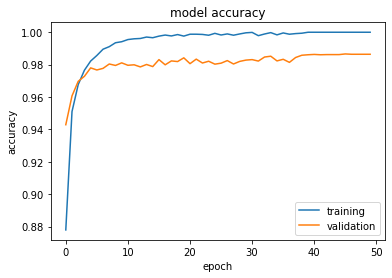

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Second NN model

In [25]:
model3 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model3.add(Dense(units=784, activation='sigmoid', input_shape=(image_size,)))
model3.add(Dense(units=500, activation='sigmoid'))
model3.add(Dense(units=250, activation='sigmoid'))
model3.add(Dense(units=100, activation='sigmoid'))
model3.add(Dense(units=10, activation='softmax'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 500)               392500    
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dense_7 (Dense)             (None, 100)               25100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,159,300
Trainable params: 1,159,300
Non-trainable params: 0
_________________________________________________________________


In [26]:
model3.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy','AUC','Precision','Recall'])
import timeit
start = timeit.timeit()
history2 = model3.fit(x_train, y_train, batch_size=64, epochs=50, verbose=True,validation_data=(x_test, y_test) )#validation_split=.1
#loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)

Epoch 1/50
938/938 [==============================] - 7s 7ms/step - loss: 0.5144 - accuracy: 0.8423 - auc: 0.9843 - precision: 0.9278 - recall: 0.7809 - val_loss: 0.2141 - val_accuracy: 0.9368 - val_auc: 0.9957 - val_precision: 0.9479 - val_recall: 0.9281
Epoch 2/50
938/938 [==============================] - 7s 7ms/step - loss: 0.1674 - accuracy: 0.9507 - auc: 0.9968 - precision: 0.9591 - recall: 0.9438 - val_loss: 0.1432 - val_accuracy: 0.9549 - val_auc: 0.9977 - val_precision: 0.9623 - val_recall: 0.9485
Epoch 3/50
938/938 [==============================] - 7s 7ms/step - loss: 0.1122 - accuracy: 0.9673 - auc: 0.9980 - precision: 0.9727 - recall: 0.9629 - val_loss: 0.1203 - val_accuracy: 0.9629 - val_auc: 0.9976 - val_precision: 0.9682 - val_recall: 0.9590
Epoch 4/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0846 - accuracy: 0.9749 - auc: 0.9986 - precision: 0.9786 - recall: 0.9722 - val_loss: 0.0966 - val_accuracy: 0.9717 - val_auc: 0.9980 - val_precision: 0.97

In [27]:
end = timeit.timeit()
print(abs(end - start))

-0.0007018999999672815


In [28]:
#loss2, accuracy2  = model3.evaluate(x_test, y_test, verbose=True)

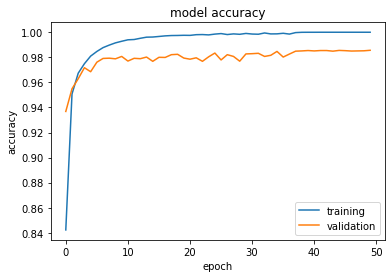

In [29]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()